In [1]:
import pandas as pd
import numpy as np
url=r"C:\Users\akiny\Downloads\NFA 2019 public_data.csv"
dt=pd.read_csv(url)
dt.head()

C:\Users\akiny\AppData\Local\Temp\ipykernel_3724\1300646331.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dt=pd.read_csv(url)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [2]:
dt.isnull().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [3]:
dt.shape

(72186, 12)

In [4]:
dt['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

In [5]:
ndt=dt.dropna()

In [6]:
ndt['QScore'].value_counts()

3A    51473
2A      224
1A       16
Name: QScore, dtype: int64

<AxesSubplot:>

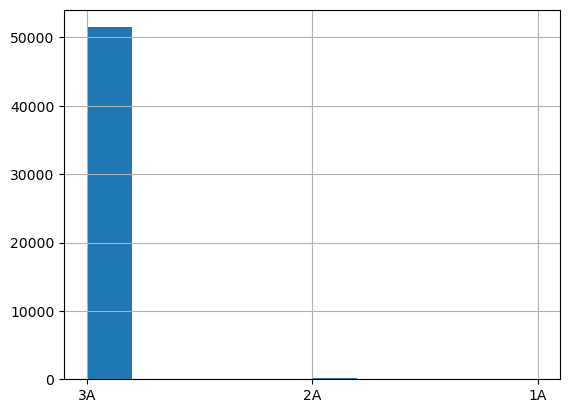

In [7]:
ndt['QScore'].hist()

In [8]:
dt_2a=ndt[ndt.QScore=='2A']
dt_3a=ndt[ndt.QScore=='3A'].sample(350)
dt_n=dt_2a.append(dt_3a)
import sklearn.utils as st
dt_n=st.shuffle(dt_n)
dt_n=dt_n.reset_index(drop=True)
dt_n.head()

C:\Users\akiny\AppData\Local\Temp\ipykernel_3724\2799800976.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt_n=dt_2a.append(dt_3a)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Moldova,1995,146,BiocapTotGHA,3.906375e+06,2.627887e+05,283526.1171,3.410414e+04,232558.016200,0.000000e+00,4.719352e+06,3A
1,Zimbabwe,1989,181,AreaPerCap,2.999230e-01,1.008327e+00,2.242948735,3.948482e-02,0.041973,0.000000e+00,3.632656e+00,3A
2,Chad,2010,39,BiocapPerCap,5.394200e-01,1.212984e+00,0.456603429,7.669503e-02,0.072878,0.000000e+00,2.358581e+00,3A
3,Norway,1964,162,EFConsTotGHA,2.307844e+06,2.191187e+06,4789697.476,1.135163e+07,128658.983000,5.797655e+06,2.656667e+07,3A
4,Chad,1990,39,EFProdTotGHA,1.538896e+06,5.253695e+06,2181887.84,1.081099e+05,143179.822000,4.863320e+04,9.274402e+06,3A


In [28]:
Y=dt_n['QScore']
dt_nn=dt_n.drop(columns=['country','year','QScore','country_code'])
from sklearn.model_selection import train_test_split
tts=train_test_split
x_train,x_test,y_train,y_test=tts(dt_nn,Y,test_size=0.3,random_state=0)
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
enc=LabelEncoder()
xtre=enc.fit_transform(x_train['record'])
xtte=enc.transform(x_test['record'])
x_train['record']=xtre
x_test['record']=xtte
import imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=1)
bal_x,bal_y=smt.fit_resample(x_train,y_train)
mms=MinMaxScaler()

drp_r=bal_x.drop(columns=['record'])
drp_rt=x_test.drop(columns=['record'])

xtr_n=mms.fit_transform(drp_r)
xtt_n=mms.transform(drp_rt)

xtr=pd.DataFrame(xtr_n,columns=drp_r.columns)
xts=pd.DataFrame(xtt_n,columns=drp_rt.columns)

xtr['record']=bal_x['record']
xts['record']=x_test['record'].reset_index(drop=True)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtr,bal_y)

LogisticRegression()

In [30]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
cvs=cross_val_score
loo=LeaveOneOut()
scr=cvs(lr,xtr,bal_y,cv=5,scoring='f1_macro')
sc1=cvs(lr,xtr,bal_y,cv=loo,scoring='f1_macro')

In [31]:
scr.mean()

0.4859001049032746

In [32]:
sc1.mean()

0.5348837209302325

In [33]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
import seaborn as sb
cm=confusion_matrix
pred=lr.predict(x_test)


C:\Users\akiny\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [34]:
cm(y_test,pred)

array([[ 0, 81],
       [ 0, 92]], dtype=int64)

<AxesSubplot:>

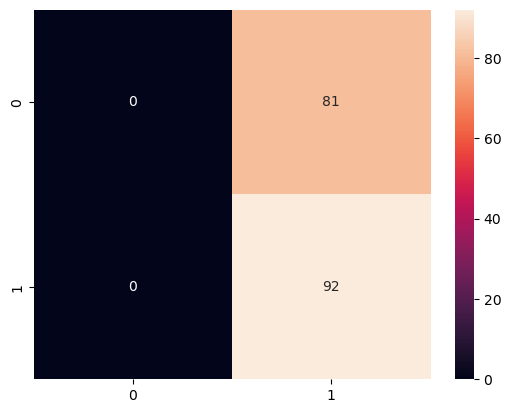

In [35]:
sb.heatmap(cm(y_test,pred),annot=True)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)

In [38]:
dtc.fit(xtr,bal_y)

DecisionTreeClassifier(random_state=1)

In [39]:
dtc.score(xtr,bal_y)

0.7674418604651163

In [41]:
dtc.score(xts,y_test)

0.5549132947976878

In [60]:
import xgboost as xgbt
xgb=xgbt.XGBClassifier(n_estimators=10)
enc_tr=enc.fit_transform(bal_y)
enc_t=enc.transform(y_test)
xgb.fit(xtr,enc_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
xgb.score(xts,enc_t)
#sb.heatmap(cm(enc_t,xgb.predict(xts)),annot=True)

0.6820809248554913

<AxesSubplot:>

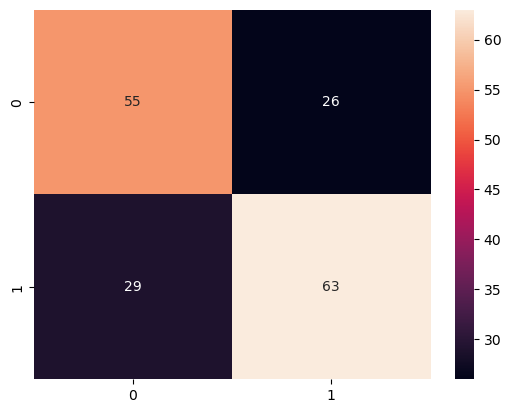

In [62]:
sb.heatmap(cm(enc_t,xgb.predict(xts)),annot=True)

0.9728682170542635

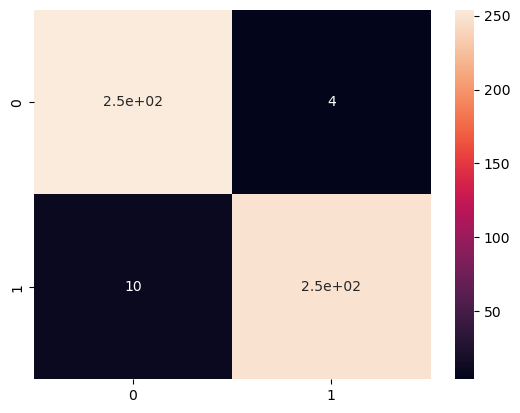

In [64]:
sb.heatmap(cm(enc_tr,xgb.predict(xtr)),annot=True)
xgb.score(xtr,enc_tr)